<a href="https://colab.research.google.com/github/sree-vg/FAANG/blob/main/FAANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# FAANG Stock Price Prediction Project

In [ ]:
# Install required libraries
!pip install mlflow xgboost seaborn matplotlib scikit-learn pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

import mlflow
import mlflow.sklearn
import mlflow.xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.3 MB/s eta 0:00:00


Load dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
print(df.head())
print(df.shape)
df.info()
df.describe()

Saving FAANG - FAANG.csv.csv to FAANG - FAANG.csv.csv
  Company Ticker      Date      Open      High       Low     Close  Adj Close  \
0   Apple   AAPL  1/3/2005  1.156786  1.162679  1.117857  1.130179   0.954409   
1   Apple   AAPL  1/4/2005  1.139107  1.169107  1.124464  1.141786   0.964210   
2   Apple   AAPL  1/5/2005  1.151071  1.165179  1.143750  1.151786   0.972655   
3   Apple   AAPL  1/6/2005  1.154821  1.159107  1.130893  1.152679   0.973409   
4   Apple   AAPL  1/7/2005  1.160714  1.243393  1.156250  1.236607   1.044284   

       Volume    Market Cap  ...  Price to Book Ratio  Enterprise Value  \
0   691992000  3.580000e+12  ...             53.66043      3.570000e+12   
1  1096810400  3.580000e+12  ...             53.66043      3.570000e+12   
2   680433600  3.580000e+12  ...             53.66043      3.570000e+12   
3   705555200  3.580000e+12  ...             53.66043      3.570000e+12   
4  2227450400  3.580000e+12  ...             53.66043      3.570000e+12   

     Tot

,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,EPS,...,Price to Book Ratio,Enterprise Value,Total Debt,Total Assets,Total Equity,Beta (5Y),Annual Dividend Rate,Trailing Twelve Months (TTM) Revenue,Trailing Twelve Months (TTM) EBITDA,Trailing Twelve Months (TTM) Earnings
count,23055.000000,23055.000000,23055.000000,23055.000000,23055.000000,2.305500e+04,2.305500e+04,23055.000000,18073.000000,23055.00000,...,23055.000000,2.305500e+04,2.305500e+04,0.0,0.0,18073.000000,13091.000000,0.0,0.0,0.0
mean,93.647661,94.863101,92.420934,93.672274,93.206572,1.384445e+08,1.912023e+12,35.912447,1.154244,10.29935,...,19.221725,1.889801e+12,7.078233e+10,NaN,NaN,1.154244,1.162585,NaN,NaN,NaN
std,126.060231,127.749769,124.330704,126.069016,126.123574,2.430001e+08,1.084576e+12,8.300362,0.079878,6.07117,...,18.271000,1.090111e+12,5.493995e+10,NaN,NaN,0.079878,0.476994,NaN,NaN,NaN
min,1.139107,1.159107,1.117857,1.130179,0.954409,1.144000e+06,3.250000e+11,23.492826,1.038000,4.18000,...,6.708661,3.010000e+11,1.598133e+10,NaN,NaN,1.038000,0.800000,NaN,NaN,NaN
25%,11.728979,11.864486,11.587829,11.720929,11.366614,2.131500e+07,1.470000e+12,29.612986,1.038000,6.57000,...,8.437223,1.440000e+12,2.871900e+10,NaN,NaN,1.038000,0.800000,NaN,NaN,NaN
50%,38.584999,38.983002,38.297501,38.598499,38.050781,5.576380e+07,2.000000e+12,35.789955,1.147000,6.97000,...,9.359326,1.930000e+12,3.799100e+10,NaN,NaN,1.147000,1.000000,NaN,NaN,NaN
75%,134.849998,136.550003,133.449997,134.970001,134.173950,1.302896e+08,2.020000e+12,42.824500,1.239000,17.67000,...,14.262457,2.040000e+12,1.010000e+11,NaN,NaN,1.239000,1.000000,NaN,NaN,NaN
max,734.900024,736.000000,722.500000,730.289978,730.289978,3.372970e+09,3.580000e+12,45.496414,1.239000,19.56000,...,53.660430,3.570000e+12,1.580000e+11,NaN,NaN,1.239000,2.000000,NaN,NaN,NaN


Checking for missing values and updating date types

In [ ]:
df.isnull().sum()

,0
Company,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Market Cap,0


Drop irrelevant and static columns

In [ ]:
irrelevant_cols_to_drop = [
    'Revenue','Gross Profit','Operating Income','Cash Ratio',
    'Total Assets','Total Equity',
    'Trailing Twelve Months (TTM) Revenue',
    'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings',
]
df.drop(columns=irrelevant_cols_to_drop, inplace=True, errors='ignore')

In [ ]:
df['Company'].value_counts()

,count
Company,
Apple,4983
Google,4983
Amazon,4982
Netflix,4982
Facebook,3125


Do not run This


In [ ]:
df.groupby("Company")["Beta"].value_counts()
df.groupby("Company")["Beta (5Y)"].value_counts()
df.groupby("Company")["Dividends Paid"].value_counts()
df.groupby("Company")["Dividend Yield"].value_counts()
df.groupby("Company")["Annual Dividend Rate"].value_counts()

,,count
Company,Annual Dividend Rate,
Apple,1.0,4983
Facebook,2.0,3125
Google,0.8,4983


In [ ]:
df=df.drop(["Beta", "Dividends Paid", "Dividend Yield", "Annual Dividend Rate", "Beta (5Y)"],axis=1)


In [ ]:
df.isnull().sum()

,0
Company,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Market Cap,0


In [ ]:
print("Remaining columns:", df.columns.tolist())
print("Shape after drop:", df.shape)

Remaining columns: ['Company', 'Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Market Cap', 'PE Ratio', 'EPS', 'Forward PE', 'Net Income', 'Debt to Equity', 'Return on Equity (ROE)', 'Current Ratio', 'Quarterly Revenue Growth', 'Analyst Recommendation', 'Target Price', 'Free Cash Flow', 'Operating Margin', 'Profit Margin', 'Quick Ratio', 'Price to Book Ratio', 'Enterprise Value', 'Total Debt']
Shape after drop: (23055, 27)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

Handle missing values

In [ ]:
# Forward fill for price-related columns
price_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close']
df[price_cols] = df[price_cols].astype(float)
df[price_cols] = df[price_cols].ffill()

# Median for numeric features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(price_cols)
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Mode for categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if not df[col].mode().empty:   # avoid error if mode() is empty
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
if 'Analyst Recommendation' in df.columns:
    unique_vals = df['Analyst Recommendation'].dropna().unique()
    if len(unique_vals) <= 1:
        print(f"Dropping 'Analyst Recommendation' because single value found: {unique_vals}")
        df.drop(columns=['Analyst Recommendation'], inplace=True)
    else:
        le = LabelEncoder()
        df['Analyst Recommendation'] = le.fit_transform(df['Analyst Recommendation'].astype(str))
        joblib.dump(le, "analyst_reco_encoder.pkl")


Dropping 'Analyst Recommendation' because single value found: ['buy']


Standardize and sort by date

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# Add Year, Month, Day for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

Handle outliers (IQR clipping)

In [ ]:
columns = ['Open', 'High', 'Low', 'Volume']
for col in columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

Feature Engineering

In [ ]:
if 'Ticker' in df.columns:
    df = pd.get_dummies(df, columns=['Ticker'], prefix='Ticker', drop_first=False)
    print("✅ One-hot encoding complete. Columns now include:",
          [c for c in df.columns if c.startswith('Ticker_')])

✅ One-hot encoding complete. Columns now include: ['Ticker_AAPL', 'Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX']


In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

df_original = df.copy()

le_company = LabelEncoder()
df["Company_encoded"] = le_company.fit_transform(df["Company"])
joblib.dump(le_company, "company_encoder.pkl")

if "Ticker" in df.columns:
    df = pd.get_dummies(df, columns=["Ticker"], prefix="Ticker", drop_first=False)

allowed_features = [
    "Open", "High", "Low", "Adj Close",   # optional but OK
    "Volume",
    "Year", "Month", "Day",
    "Company_encoded",
    "Ticker_AAPL", "Ticker_AMZN", "Ticker_GOOGL", "Ticker_META", "Ticker_NFLX"
]

X = df[allowed_features].copy()

feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

# Target
y = df["Close"]

# Time-series split
train_size = int(len(X) * 0.8)
X_train = X.iloc[:train_size]
X_test  = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (18444, 14) Test size: (4611, 14)


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaler fitted on training data.")
print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)gjkjdk


Scaler fitted on training data.
Scaled train shape: (18444, 14)
Scaled test shape: (4611, 14)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler (better for stock prices)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# save for Streamlit use
joblib.dump(scaler, "standard_scaler.pkl")

print("Scaler fitted on training data (StandardScaler).")
print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)



Scaler fitted on training data (StandardScaler).
Scaled train shape: (18444, 14)
Scaled test shape: (4611, 14)


In [ ]:
df.isnull().sum()

,0
Company,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Market Cap,0
PE Ratio,0


Exploratory Data Analysis (EDA)

In [ ]:
df_plot = df.copy()

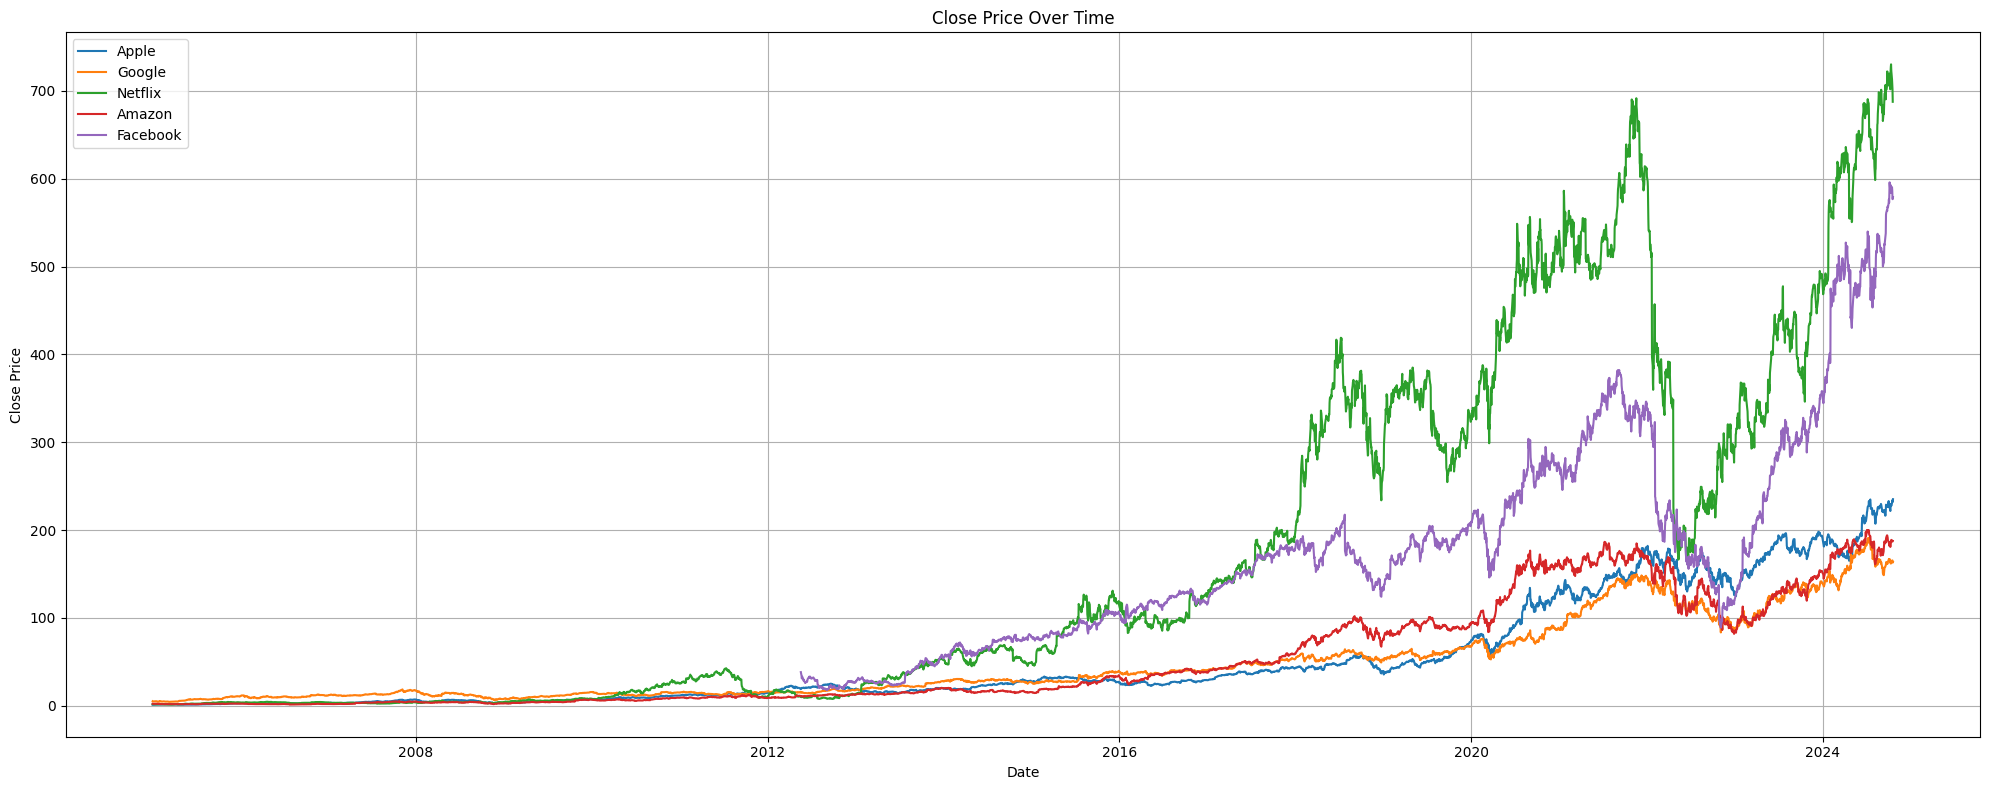

In [ ]:
# Close Price Over Time
plt.figure(figsize=(20,8))
for company in df_plot['Company'].unique():
    plt.plot(df_plot[df_plot['Company']==company]['Date'],
             df_plot[df_plot['Company']==company]['Close'], label=company)
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

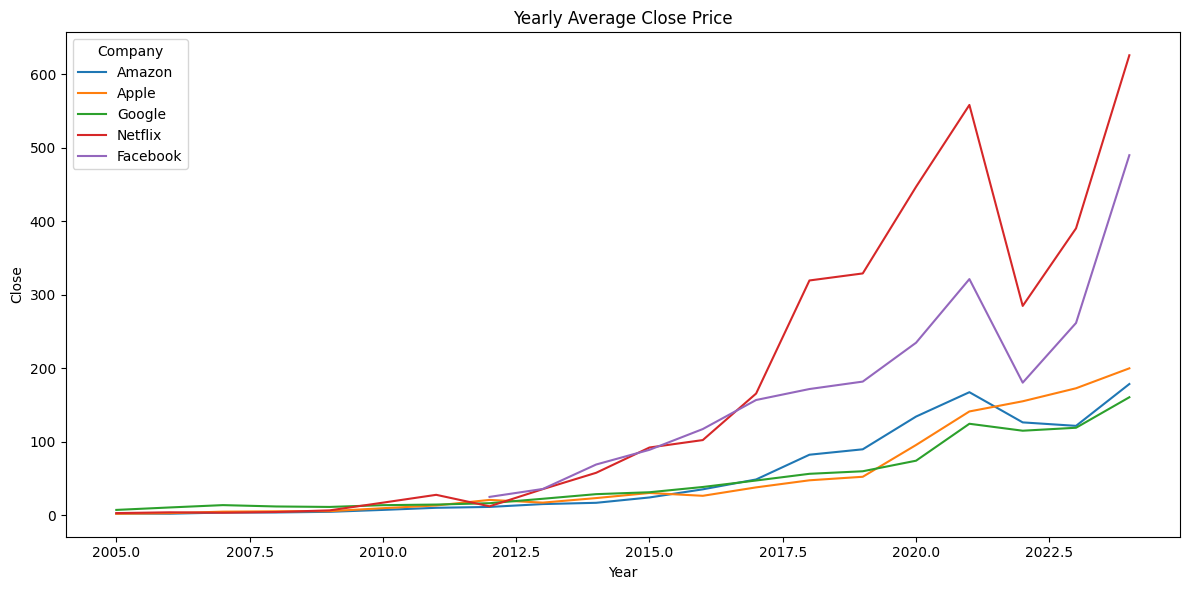

In [ ]:
# Yearly Average Close Price
yearly_avg = df_plot.groupby(['Year','Company'])['Close'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_avg, x='Year', y='Close', hue='Company')
plt.title('Yearly Average Close Price')
plt.tight_layout()
plt.show()

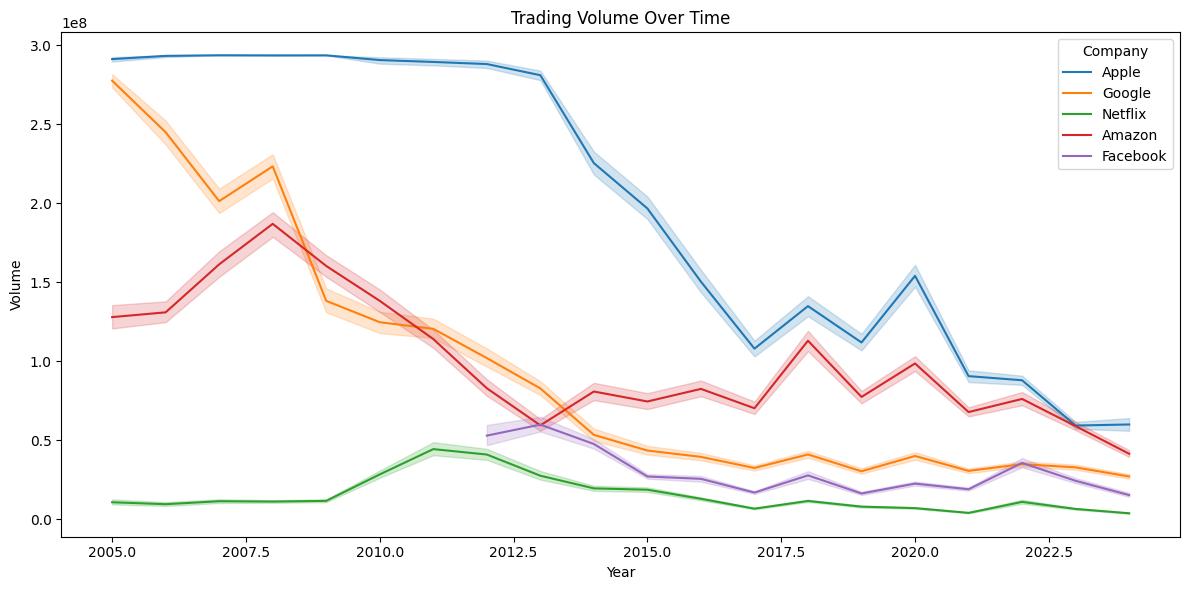

In [ ]:
# Trading Volume Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_plot, x='Year', y='Volume', hue='Company')
plt.title('Trading Volume Over Time')
plt.tight_layout()
plt.show()

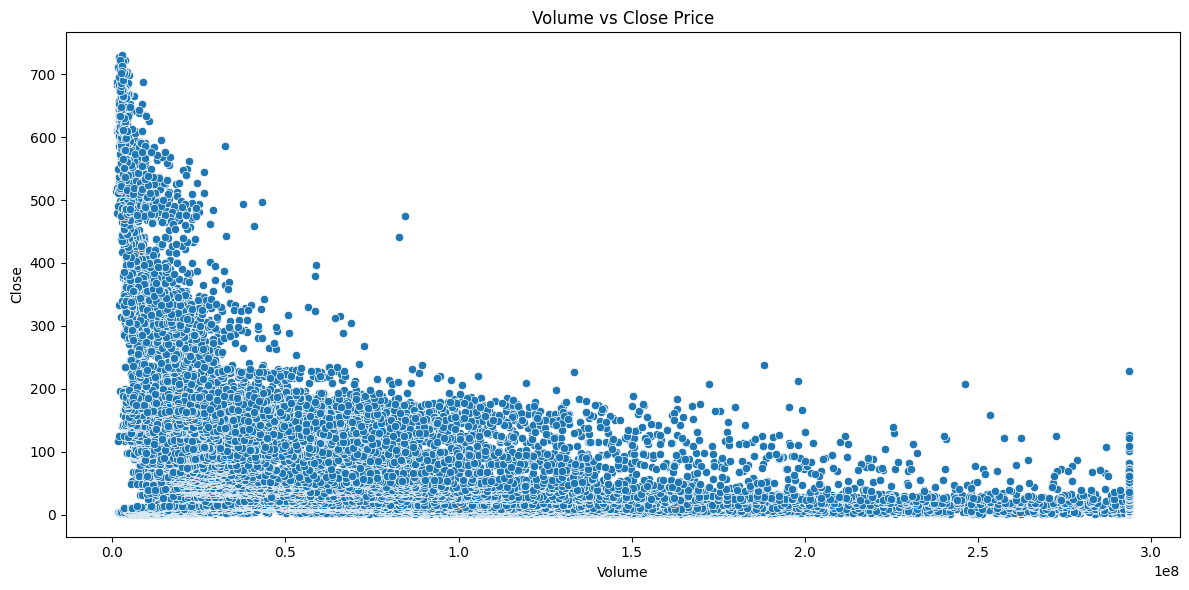

In [ ]:
# Volume vs Close Price
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_plot, x='Volume', y='Close')
plt.title('Volume vs Close Price')
plt.tight_layout()
plt.show()

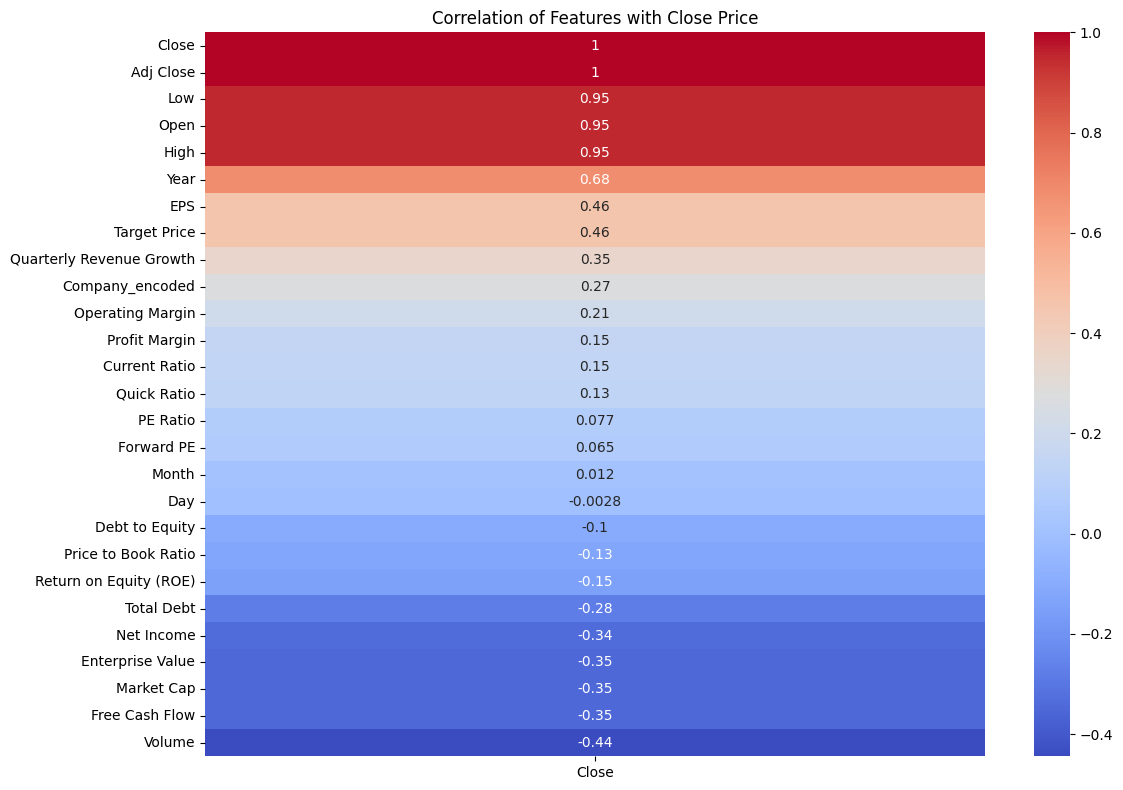

In [ ]:
# Correlation Heatmap
numeric_cols = df_plot.select_dtypes(include=np.number).columns.tolist()
corr = df_plot[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[['Close']].sort_values('Close', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Close Price")
plt.tight_layout()
plt.show()

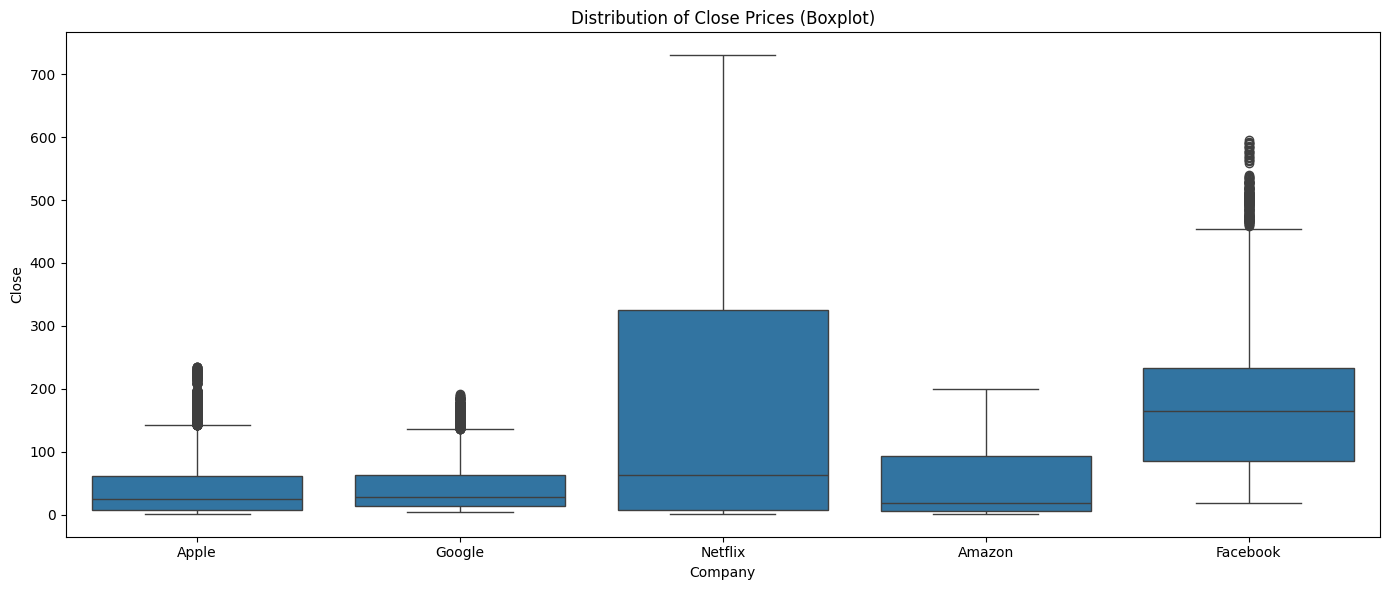

In [ ]:
# Boxplot of Close Prices
plt.figure(figsize=(14,6))
sns.boxplot(x='Company', y='Close', data=df_plot)
plt.title('Distribution of Close Prices (Boxplot)')
plt.tight_layout()
plt.show()

Preparing data for Machine learning





In [ ]:
import pickle

In [ ]:
# Import regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Define models with parameters
models = [
    ('Decision Tree', {'max_depth': 5, "min_samples_split": 5}, DecisionTreeRegressor()),
    ('Random Forest', {'n_estimators': 150, 'max_depth': 5}, RandomForestRegressor()),
    ('Gradient Boosting', {'n_estimators': 150, 'learning_rate': 0.1}, GradientBoostingRegressor()),
    ('SVR', {'kernel': "rbf", "C": 1, 'epsilon': 0.1}, SVR()),
    ('XGBoost', {'n_estimators': 150, 'learning_rate': 0.1}, XGBRegressor())
]

results = []

for model_name, params, model in models:
    model.set_params(**params)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((model_name, rmse, mae, r2))

results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE', 'R2 Score'])

results_df = results_df.sort_values(by='R2 Score', ascending=False)

results_df




,Model,RMSE,MAE,R2 Score
2,Gradient Boosting,16.180069,4.084880,0.988785
0,Decision Tree,23.632452,9.777066,0.976075
1,Random Forest,24.176148,8.066856,0.974962
4,XGBoost,25.319085,9.039110,0.972538
3,SVR,114.123179,54.378407,0.442072


Training models

In [ ]:
!pip install mlflow pyngrok xgboost --quiet


In [ ]:
import os
import pickle
import joblib
import time
import numpy as np
import pandas as pd

from pyngrok import ngrok
import mlflow
import mlflow.sklearn

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [ ]:
#  DagsHub MLflow Setup

os.environ["MLFLOW_TRACKING_USERNAME"] = "tstr12cg429"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "8f1506a93e303aeadc00a8183458df131d6d1d31"

mlflow.set_tracking_uri("https://dagshub.com/tstr12cg429/my-first-repo.mlflow")
mlflow.set_experiment("FAANG_Stock_Prediction")

print("✅ Connected to DagsHub MLflow")


✅ Connected to DagsHub MLflow


In [ ]:
models = [
    ('Linear Regression', {}, LinearRegression()),
    ('Decision Tree', {'max_depth': 5, "min_samples_split": 5}, DecisionTreeRegressor()),
    ('Random Forest', {'n_estimators': 150, 'max_depth': 5}, RandomForestRegressor()),
    ('Gradient Boosting', {'n_estimators': 150, 'learning_rate': 0.1}, GradientBoostingRegressor()),
    ('SVR', {'kernel': "rbf", "C": 1, 'epsilon': 0.1}, SVR()),
    ('XGBoost', {'n_estimators': 150, 'learning_rate': 0.1}, XGBRegressor())
]

In [ ]:
best_r2 = -np.inf
best_model = None
best_params = None
best_run_id = None

for name, params, model in models:
    with mlflow.start_run(run_name=name) as run:


        model.set_params(**params)
        model.fit(X_train_scaled, y_train)


        preds = model.predict(X_test_scaled)


        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)


        mlflow.log_params(params)
        mlflow.log_metrics({"MAE": mae, "RMSE": rmse, "R2": r2})


        model_filename = f"{name.replace(' ', '_')}_model.pkl"
        with open(model_filename, "wb") as f:
            pickle.dump(model, f)

        mlflow.log_artifact(model_filename)


        run_id = run.info.run_id
        print(f"✅ {name} | R2 = {r2:.4f} | run_id = {run_id}")


        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_params = params
            best_run_id = run_id

print(f"\n🎯 MLflow Best Model Run ID: {best_run_id}")


✅ Linear Regression | R2 = 1.0000 | run_id = 8c9eff94a0cc4dcf9f5f15af01e8bbfe
🏃 View run Linear Regression at: https://dagshub.com/tstr12cg429/my-first-repo.mlflow/#/experiments/0/runs/8c9eff94a0cc4dcf9f5f15af01e8bbfe
🧪 View experiment at: https://dagshub.com/tstr12cg429/my-first-repo.mlflow/#/experiments/0
✅ Decision Tree | R2 = 0.9761 | run_id = b3c5b2b42f154988ab3cc62b789a4b16
🏃 View run Decision Tree at: https://dagshub.com/tstr12cg429/my-first-repo.mlflow/#/experiments/0/runs/b3c5b2b42f154988ab3cc62b789a4b16
🧪 View experiment at: https://dagshub.com/tstr12cg429/my-first-repo.mlflow/#/experiments/0
✅ Random Forest | R2 = 0.9751 | run_id = e0192dc0fdca45c79580951477cbd047
🏃 View run Random Forest at: https://dagshub.com/tstr12cg429/my-first-repo.mlflow/#/experiments/0/runs/e0192dc0fdca45c79580951477cbd047
🧪 View experiment at: https://dagshub.com/tstr12cg429/my-first-repo.mlflow/#/experiments/0
✅ Gradient Boosting | R2 = 0.9884 | run_id = 254246651c2044479db89f32fff3a185
🏃 View run 

In [ ]:
y_pred_final = best_model.predict(X_test_scaled)

mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

print("\n📊 Final Model Performance (Using Scaled Data):")
print(f"MAE  : {mae_final:.4f}")
print(f"RMSE : {rmse_final:.4f}")
print(f"R2   : {r2_final:.4f}")


joblib.dump(best_model, "best_final_model.pkl")


📊 Final Model Performance (Using Scaled Data):
MAE  : 0.4121
RMSE : 0.5830
R2   : 1.0000


['best_final_model.pkl']

In [ ]:

joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "standard_scaler.pkl")
joblib.dump(le_company, "company_encoder.pkl")
joblib.dump(feature_columns, "feature_columns.pkl")

print("✅ Saved best model, scaler, encoder, and features")


✅ Saved best model, scaler, encoder, and features


In [ ]:
with mlflow.start_run(run_name="best_final_model"):
    mlflow.log_params(best_params)
    mlflow.log_metric("MAE", mae_final)
    mlflow.log_metric("RMSE", rmse_final)
    mlflow.log_metric("R2", r2_final)
    mlflow.log_artifact("best_final_model.pkl")

print("✅ Logged final model to DagsHub MLflow successfully!")


🏃 View run best_final_model at: https://dagshub.com/tstr12cg429/my-first-repo.mlflow/#/experiments/0/runs/5f5a2c8771d4421886cf2ac9343a9d2b
🧪 View experiment at: https://dagshub.com/tstr12cg429/my-first-repo.mlflow/#/experiments/0
✅ Logged final model to DagsHub MLflow successfully!


💾 Saving and Downloading Trained Model & Encoded Data Files for Streamlit Deployment

In [ ]:
import os
import joblib
from google.colab import files

SAVE_DIR = "/content/faang"
os.makedirs(SAVE_DIR, exist_ok=True)

joblib.dump(best_model, f"{SAVE_DIR}/best_model.pkl")
joblib.dump(scaler, f"{SAVE_DIR}/standard_scaler.pkl")
joblib.dump(le_company, f"{SAVE_DIR}/company_encoder.pkl")
joblib.dump(feature_columns, f"{SAVE_DIR}/feature_columns.pkl")

print("\n✅ All files saved successfully in:", SAVE_DIR)

files.download(f"{SAVE_DIR}/best_model.pkl")
files.download(f"{SAVE_DIR}/standard_scaler.pkl")
files.download(f"{SAVE_DIR}/company_encoder.pkl")
files.download(f"{SAVE_DIR}/feature_columns.pkl")




✅ All files saved successfully in: /content/faang


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(len(feature_columns))
print(model.n_features_in_)


14
14


In [ ]:
import joblib
import numpy as np
import pandas as pd

# -------- Sanity check: align sample columns, scale and predict --------
# Pick a test sample (first row from X_test)
X_sample = X_test.iloc[[0]].copy()
y_actual = y_test.iloc[0]

# Load canonical order and enforce it
feature_columns = joblib.load("feature_columns.pkl")
X_sample = X_sample[feature_columns]

# Final safety assertion: exact same column order and names
assert list(X_sample.columns) == list(feature_columns), "Column mismatch between sample and feature_columns!"

print("🧩 Feature count:", len(X_sample.columns), "==", len(feature_columns))

# Apply scaling (scaler was trained on X_train)
X_scaled = scaler.transform(X_sample)                    # returns np.array
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=X_sample.index)

# Predict using best_model
y_pred_sample = best_model.predict(X_scaled_df)
print("🎯 Actual Close Price:", y_actual)
print("🤖 Predicted Close Price:", float(y_pred_sample[0]))

# Sanity: predicted value should be positive for stock prices
if y_pred_sample[0] < 0:
    print("⚠️ WARNING: negative prediction. Investigate model choice or data leakage.")
else:
    print("✅ Prediction non-negative — scale/order fixed.")




🧩 Feature count: 14 == 14
🎯 Actual Close Price: 261.5599976
🤖 Predicted Close Price: 261.17706110253334
✅ Prediction non-negative — scale/order fixed.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
assert list(X_sample.columns) == feature_columns, "Column mismatch between training and test data!"


In [ ]:
import joblib
feature_columns = joblib.load("feature_columns.pkl")
print("✅ Feature columns from training:")
print(feature_columns)
print("\nTotal features:", len(feature_columns))
files.download(f"{SAVE_DIR}/feature_columns.pkl")



✅ Feature columns from training:
['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Year', 'Month', 'Day', 'Company_encoded', 'Ticker_AAPL', 'Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX']

Total features: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
cols = joblib.load("feature_columns.pkl")
print(cols)


['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Year', 'Month', 'Day', 'Company_encoded', 'Ticker_AAPL', 'Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX']
